## Forest Fires

**Abstract** This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data

### Dataset attributes information
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [1]:
## importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#loading the data
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
#checking the dimensions of the data
df.shape

(517, 13)

In [7]:
#let's look at the types of variables that we have in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [9]:
#statistical descriptions of data

df.describe().T   # T is to transform oppositly

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [13]:
# checking the missing values of dataset column wise
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [14]:
#our target is to predict the area so let's make it as a target variable

target = 'area'

### checking the skweness and kurtosis of the target variable

**SKEWNESS** measures the lack of symmeety in data distribution. 
 
**-** If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

**-**  If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.

**-**  If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

**Kurtosis** is all about tails of distribution. it actually the "measure of outliers" present in the distribution

Kurtosis > 3: Distribution is longer, tails are fatter. 

Kurtosis < 3: Distribution is shorter, tails are thinner than the normal distribution

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


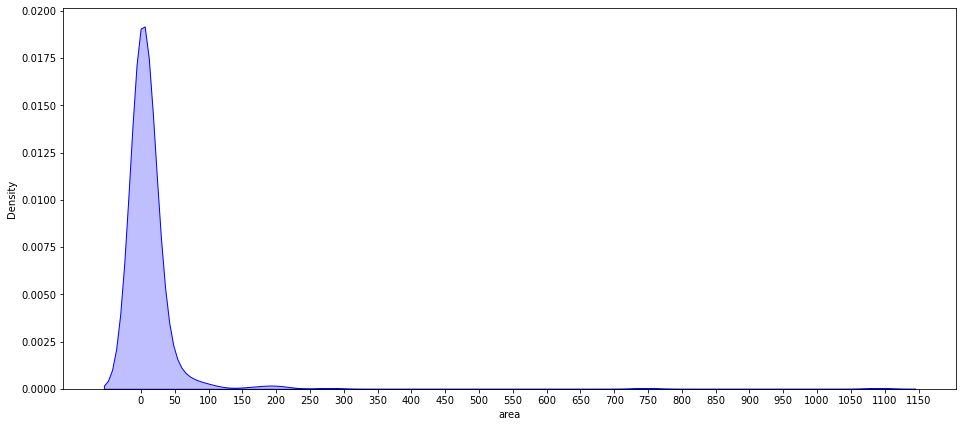

In [25]:
#skewness and kurtosis

plt.figure(figsize=(16,7))
print("Skew: {}".format(df[target].skew()))
print("Kurtosis: {}".format(df[target].kurtosis()))
ax = sns.kdeplot(df[target],shade=True,color='b')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

<font color=blue|red|pink|>Observations</font>
- the data is highly skewed with a value of +12.846 and kurtosis is very very high with a value of 194.14
- looking at the plot we can see that majority of the forest fires do not cover larger area, most of damaged area is under 50 hectares of land

So we will scale the target variable to fix the skewness and kurtosis and at last we have to inverse transforms before submitting the outputs

<AxesSubplot:xlabel='area'>

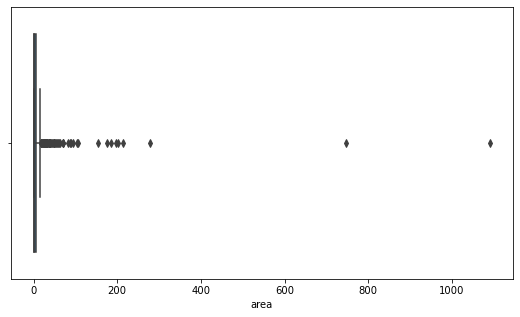

In [37]:
#checking the outliers
plt.figure(figsize=(9,5))
sns.boxplot(x=df[target])

By looking at the graph there are few outliers in the targer variable let's confirm validating with **Z-score**

Z-score describes any data point by finding their relationship with standard deviation and mean of the group of data point.

the data points which are too far from zero will be treated as **outliers**. In general threshold of 3 or -3 is used.
if z > 3 or z < -3 respectively, the data point will be identified as outliers

In [38]:
#outliers detection
from scipy.stats import zscore

y_outliers = df[abs(zscore(df[target])) >= 3]

y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [46]:
#let's look at the different type of variables
diff_data = df.drop(columns='area')
categorical = diff_data.select_dtypes(include = 'object').columns.tolist()
numericals = diff_data.select_dtypes(exclude = 'object').columns.tolist()

In [47]:
categorical,numericals

(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

<AxesSubplot:xlabel='count', ylabel='month'>

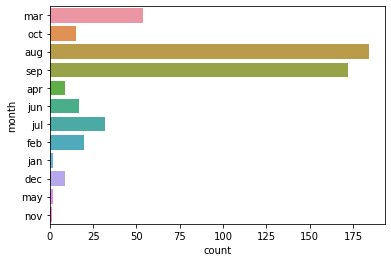

In [61]:
#checking which month have the more instances
sns.countplot(data=diff_data,y='month')

it looks that higher number of forest fires occurs in the month of August and September

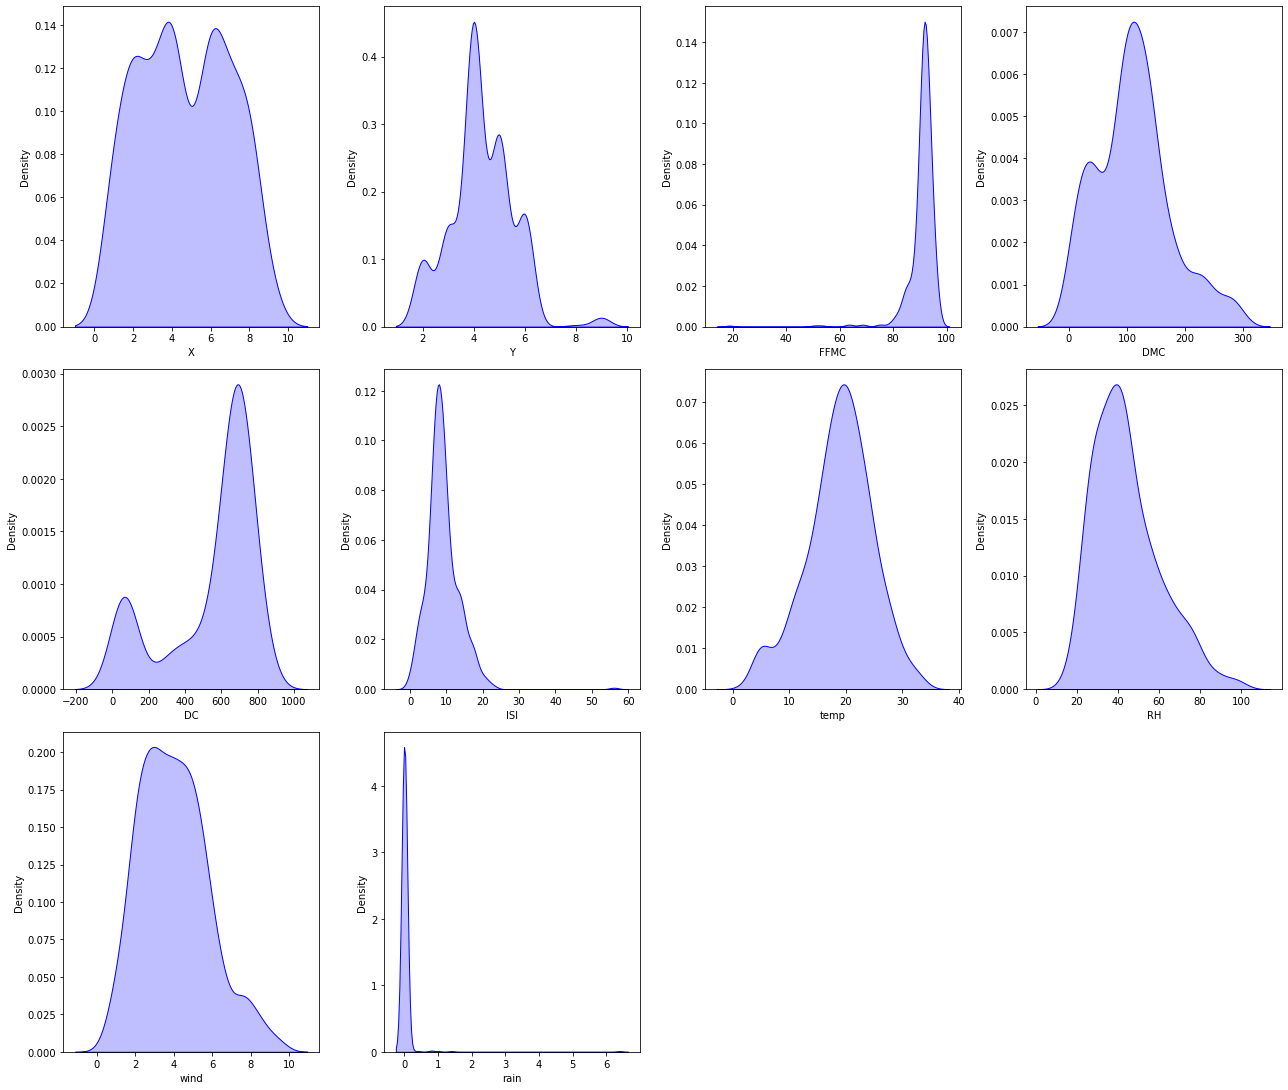

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [62]:
plt.figure(figsize=(18,40))
for i,col in enumerate(numericals,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='b',shade=True)
plt.tight_layout() 
plt.show()
num_data = df[numericals]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

from above graph, there is high postive or negative skweness and kurtosis was observed in the following columns.

1.rain

2.ISI

3.FFMC 


### Outliers Treatment

So far we observed outliers in 4 columns they are
1. rain
2. ISI
3. FFMC
4. area


In [66]:
outlier_columns = ['FFMC','ISI','rain','area']

#these outliers are not error values so we cannot remove it but in
#order to minimize the effect of outliers, we will transform above columns

### Encoding categorical variables

In [ ]:
df = pd.get_dummies(df,columns =['day','month'],drop_first = True)

In [69]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


### scaling the variables 

In [73]:
#applying log transformation to the outlier variable and let's check 
#the skewness and kurtosis again
np.log1p(df[outlier_columns]).skew(), np.log1p(df[outlier_columns]).kurtosis()

(FFMC   -11.675394
 ISI     -0.937218
 rain    14.173028
 area     1.217838
 dtype: float64,
 FFMC    185.482383
 ISI       2.584588
 rain    234.240025
 area      0.945668
 dtype: float64)

by looking at above values, even after applying log transformation the skew and kurtosis of **FFMC** and **rain** are high. we cannot perform good with such high values
so for **FFMC** we can remove the outliers in them using z-score method

In [74]:
#removing outliers in FFMC
fix_ffmc = df.loc[:,['FFMC']].apply(zscore).abs() < 3

In [75]:
fix_ffmc.head()

,FFMC
0,True
1,True
2,True
3,True
4,True


In [76]:
df= df[fix_ffmc.values]

In [78]:
df.shape

(510, 28)

In [ ]:
#transforming high skewed variables
outlier_columns.remove('rain')
df[outlier_columns] = np.log1p(df[outlier_columns])


In [81]:
df[outlier_columns].skew()

FFMC   -1.803993
ISI    -0.434372
area    1.208492
dtype: float64

In [83]:
#let's use this dataframe for machine learning model
df_ml = df.copy()

In [ ]:
df_ml.copy()

<AxesSubplot:>

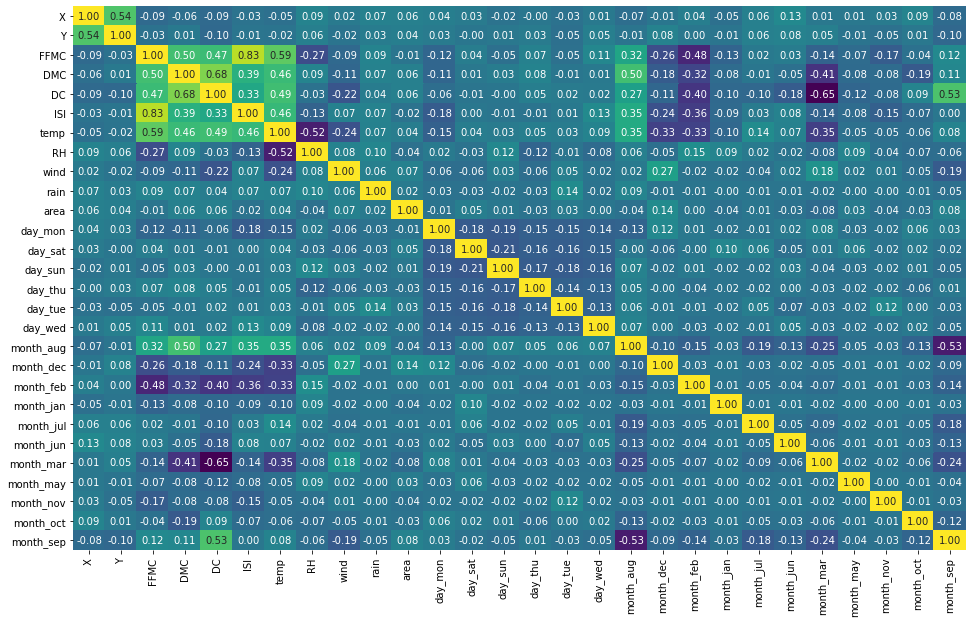

In [98]:
# checking the correlation 
plt.figure(figsize =(16,10))

sns.heatmap(df_ml.corr(),annot=True,cmap='viridis',fmt=".2f",cbar=False)

In [102]:
#dividing the dataset

X = df.drop(columns=['area'])
y = df['area']

In [103]:
X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [104]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [124]:
#splitting data for model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 44)

## Linear regression

In [125]:
#training the model to regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [126]:
#checkig the scores
print(f'Intercept: {regressor.intercept_}')
print(f'R^2 score: {regressor.score(X_train, y_train)}')
pd.DataFrame({"Coefficients": regressor.coef_}, index=X.columns)

Intercept: 1.4459065959355706
R^2 score: 0.019660820835479043


,Coefficients
FFMC,0.010017
DMC,0.001366
DC,0.000215
ISI,-0.349481
temp,0.004511
RH,-0.006675
wind,0.081556


In [131]:
#dividing the dataset

X = df.drop(columns=['day_mon', 'day_sat', 'day_sun',
                     'day_thu', 'day_tue','day_wed', 'month_aug', 
                     'month_dec', 'month_feb', 'month_jan','month_jul',
                     'month_jun', 'month_mar', 'month_may', 'month_nov',
                     'month_oct', 'month_sep','area'])
y = df['area']

In [132]:
#splitting data for model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 44)

#training the model to regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#checkig the scores
print(f'Intercept: {regressor.intercept_}')
print(f'R^2 score: {regressor.score(X_train, y_train)}')

Intercept: 0.44239945105705913
R^2 score: 0.024267880951563847


### dropping outlier columns to check if there is any model improvement

In [147]:
#dividing the dataset

X = df.drop(columns=['day_mon', 'day_sat', 'day_sun',
                     'day_thu', 'day_tue','day_wed', 'month_aug', 
                     'month_dec', 'month_feb', 'month_jan','month_jul',
                     'month_jun', 'month_mar', 'month_may', 'month_nov',
                     'month_oct', 'month_sep','area','FFMC','ISI','rain'])
y = df['area']

#splitting data for model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 44)

#training the model to regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#checkig the scores
print(f'Intercept: {regressor.intercept_}')
print(f'R^2 score: {regressor.score(X_train, y_train)}')

Intercept: 0.8489957707577935
R^2 score: 0.015496315662394289


## polynomial regression



In [141]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
#checkig the scores
print(f'Intercept: {lin_reg_2.intercept_}')
print(f'R^2 score: {lin_reg_2.score(X_poly, y_train)}')

Intercept: 18.73168734737673
R^2 score: 0.9913685227111867


### the data is not linear in nature hence a simple linear model will not help us in pumping the accuracy. So either we will have to introduce new features or use more complex models which can capture the non-linearity of the data.